<a href="https://colab.research.google.com/github/ABHIjithGT/Academic-Programs-Semester-based/blob/main/s3/Data%20Science/Lab_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix, andrews_curves, parallel_coordinates
import plotly.express as px

sns.set(style="whitegrid")

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Titanic_Train.csv')

Saving Titanic_Train.csv to Titanic_Train (1).csv


In [ ]:
print("\nHEAD\n", df.head())
print("\nTAIL\n", df.tail())
print("\nCOUNT\n", df.count())
print("\nINFO\n")
df.info()
print("\nSHAPE\n", df.shape)
print("\nDESCRIBE\n", df.describe())


HEAD
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN       

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
data = df.drop_duplicates()
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


# **1. What percentage of passengers survived?**

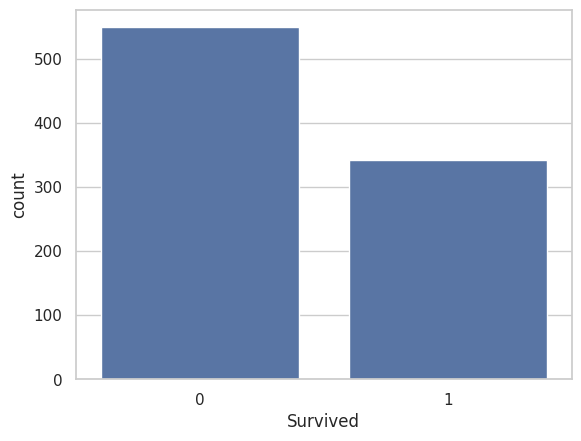



Percentage of passengers survived: 38.38%




In [ ]:
sns.countplot(x='Survived', data=df, )
plt.show()

survival_counts = df['Survived'].value_counts()
percentage_survived = (survival_counts.get(1, 0) / survival_counts.sum()) * 100

print(f"\n\nPercentage of passengers survived: {percentage_survived:.2f}%\n\n")


# **2. Did gender influence survival chances?**

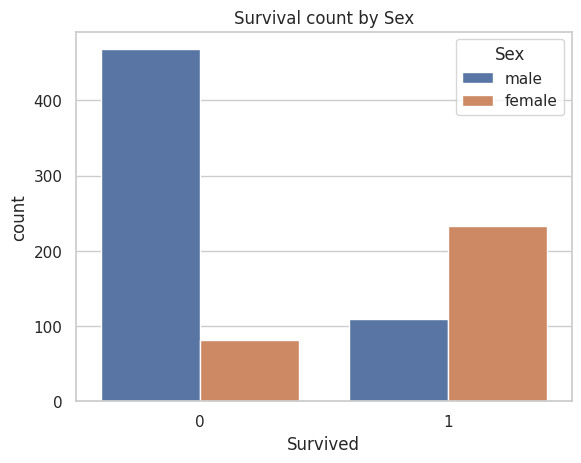

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival count by Sex')
plt.show()


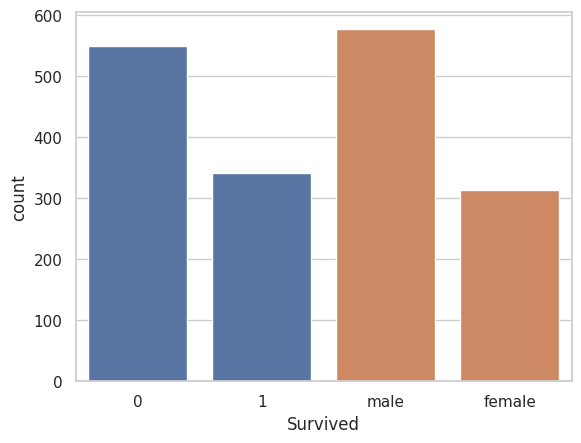

In [ ]:
sns.countplot(x='Survived', data=df, )
sns.countplot(x='Sex', data=df, )
plt.show()

# **3. How did passenger class (Pclass) affect survival?**

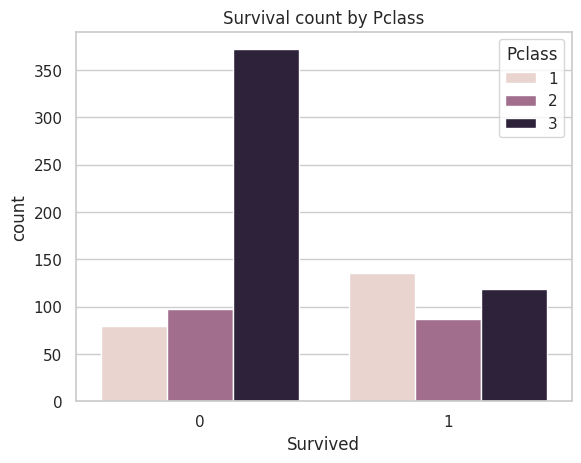

In [ ]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival count by Pclass')
plt.show()

# **4. Was age a factor in survival?**

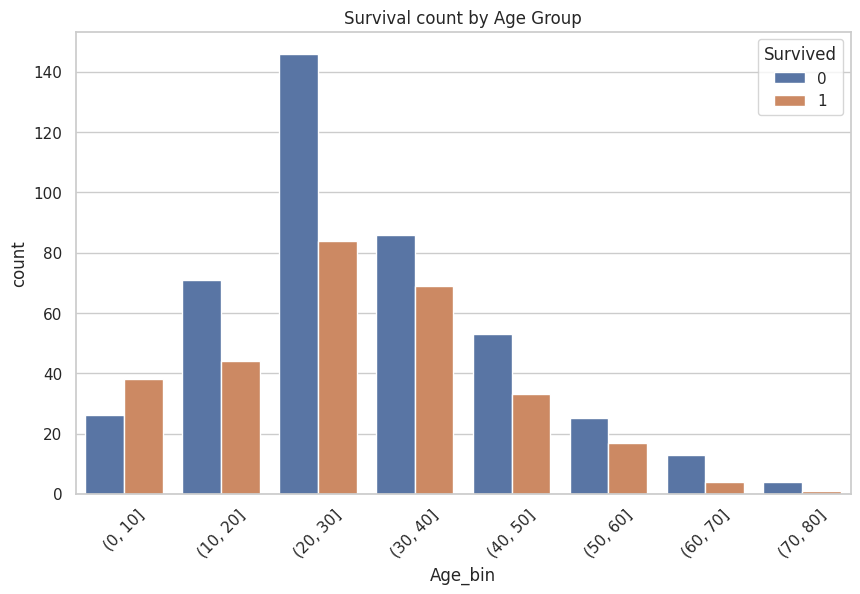

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df['Age_bin'] = pd.cut(df['Age'], bins=range(0, 90, 10))
plt.figure(figsize=(10,6))
sns.countplot(x='Age_bin', hue='Survived', data=df)
plt.title('Survival count by Age Group')
plt.xticks(rotation=45)
plt.show()


# **5. Which age group had the highest survival rate? (children, youth, adults, elderly)**

In [ ]:
import pandas as pd

# Define age groups (bins) and labels
bins = [0, 12, 25, 60, 120]
labels = ['Children', 'Youth', 'Adults', 'Elderly']

# Create a new column with age groups
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Calculate survival rate for each age group
survival_rates = df.groupby('Age_group', observed=False)['Survived'].mean() * 100


print(survival_rates)


Age_group
Children    57.971014
Youth       36.206897
Adults      41.176471
Elderly     22.727273
Name: Survived, dtype: float64


# **6. Did family size (SibSp + Parch) affect survival chances?**

In [ ]:
# Calculate family size
df['Family_size'] = df['SibSp'] + df['Parch'] + 1

# Calculate survival rate by family size
family_survival_rate = df.groupby('Family_size')['Survived'].mean() * 100

print(family_survival_rate)


Family_size
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64


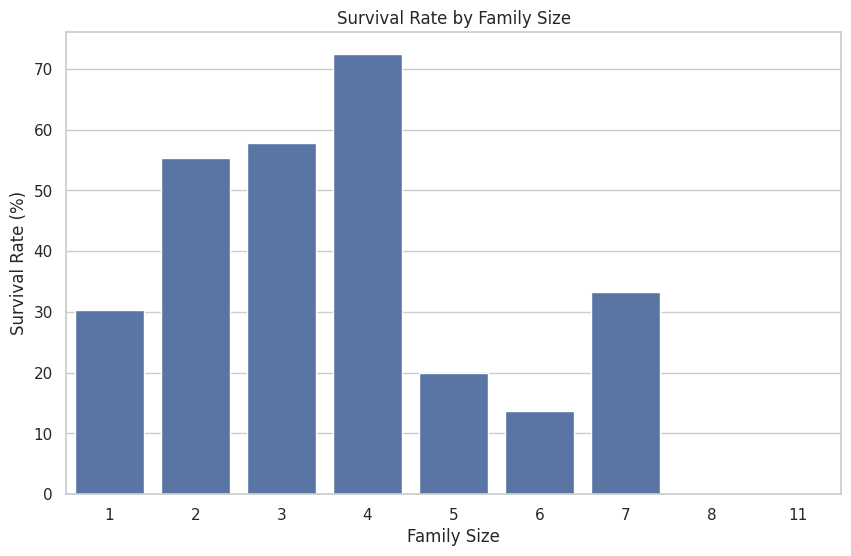

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=family_survival_rate.index, y=family_survival_rate.values)
plt.xlabel('Family Size')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Family Size')
plt.show()


# **8. Did fare have any relationship with survival?**

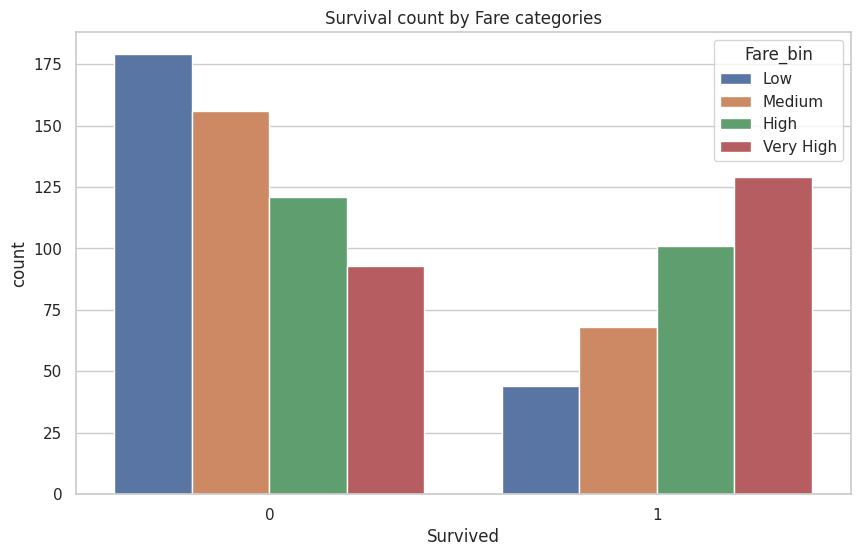

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create Fare bins (e.g., low, medium, high)
df['Fare_bin'] = pd.qcut(df['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(10,6))
sns.countplot(x='Survived', hue='Fare_bin', data=df)
plt.title('Survival count by Fare categories')
plt.show()


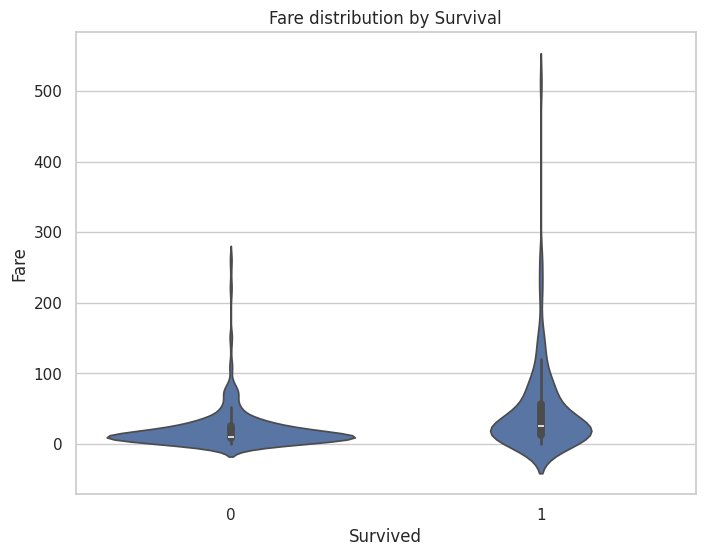

In [ ]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Survived', y='Fare', data=df)
plt.title('Fare distribution by Survival')
plt.show()


# **9. Which combination of factors best explains survival? (Gender + Class + Age)**

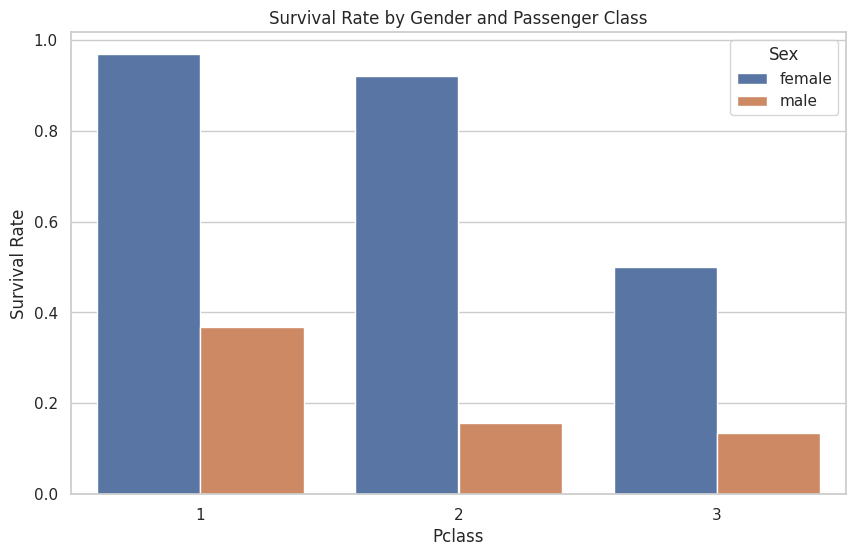

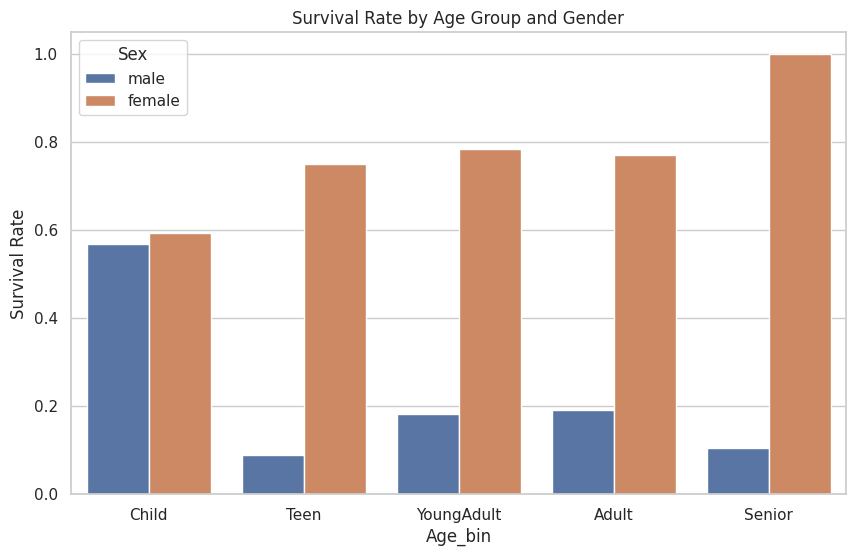

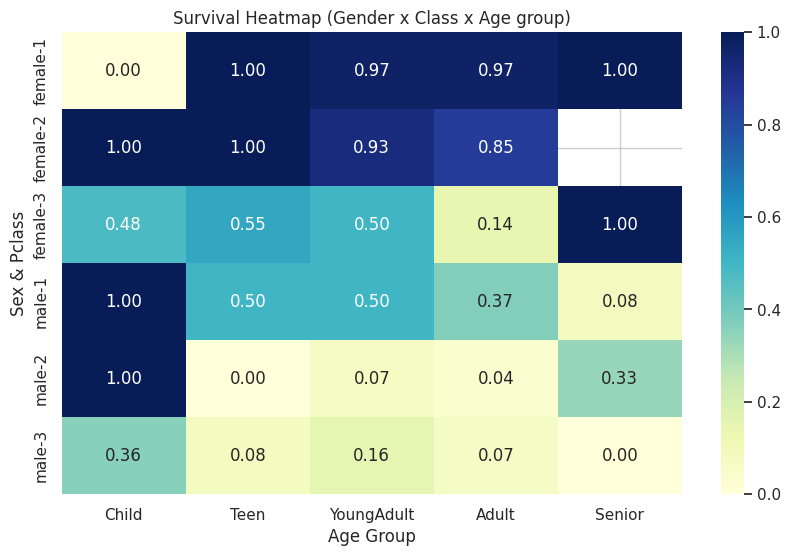

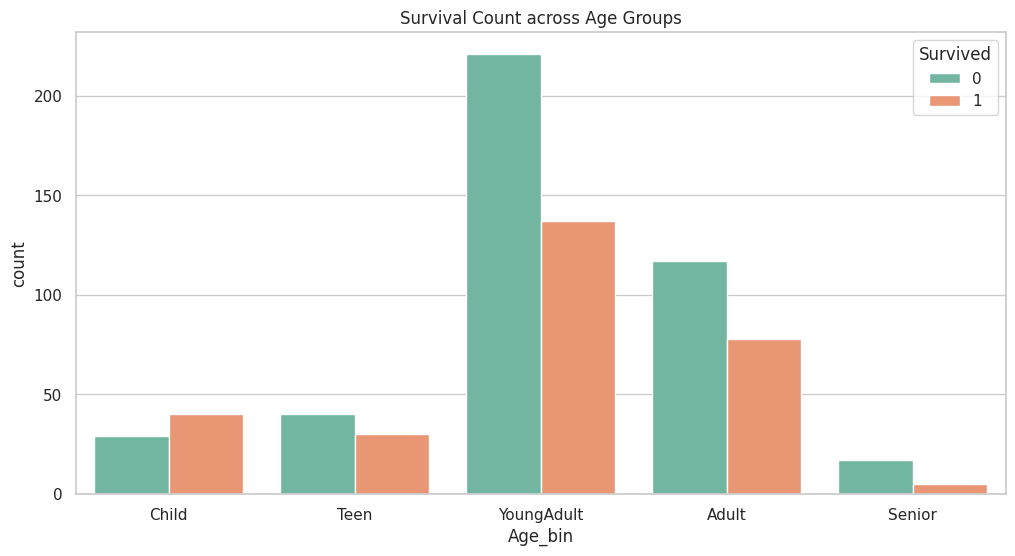

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make Age bins for visualization
df['Age_bin'] = pd.cut(
    df['Age'],
    bins=[0,12,18,35,60,80],
    labels=['Child','Teen','YoungAdult','Adult','Senior']
)

# 1. Survival by Gender + Pclass
plt.figure(figsize=(10,6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, errorbar=None)
plt.title('Survival Rate by Gender and Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# 2. Survival by Age group + Gender
plt.figure(figsize=(10,6))
sns.barplot(x='Age_bin', y='Survived', hue='Sex', data=df, errorbar=None)
plt.title('Survival Rate by Age Group and Gender')
plt.ylabel('Survival Rate')
plt.show()

# 3. Heatmap: Survival rate by Pclass + Age group + Gender
pivot = df.groupby(['Sex','Pclass','Age_bin'], observed=True)['Survived'].mean().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Survival Heatmap (Gender x Class x Age group)')
plt.ylabel('Sex & Pclass')
plt.xlabel('Age Group')
plt.show()

# 4. Count plot: Survivors split by Gender + Class + Age_bin
plt.figure(figsize=(12,6))
sns.countplot(x='Age_bin', hue='Survived', data=df, palette='Set2')
plt.title('Survival Count across Age Groups')
plt.show()


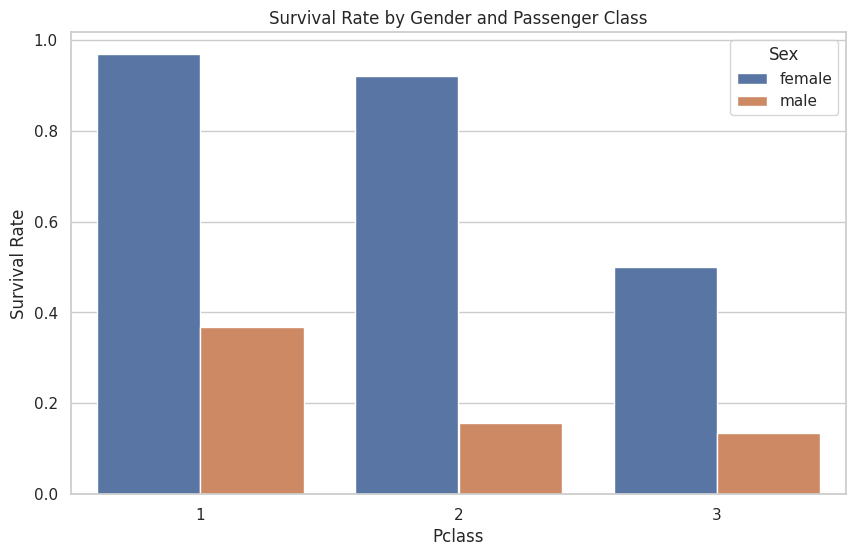

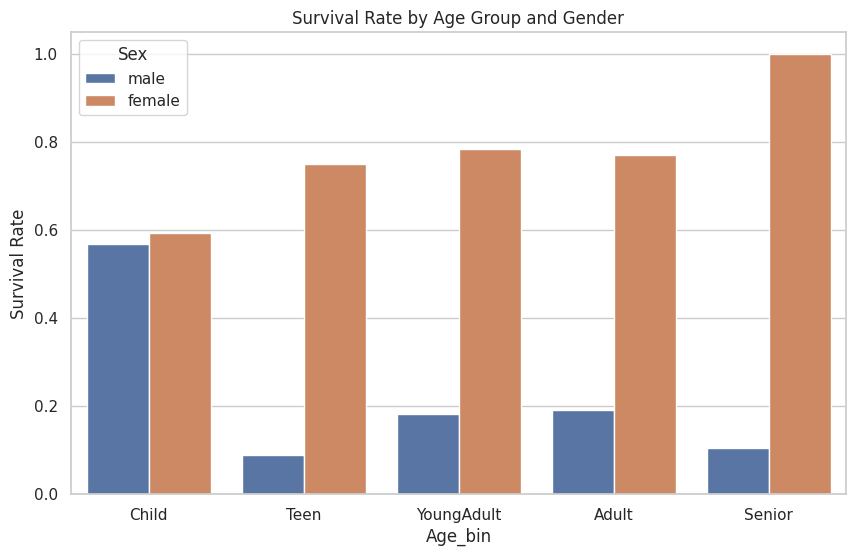

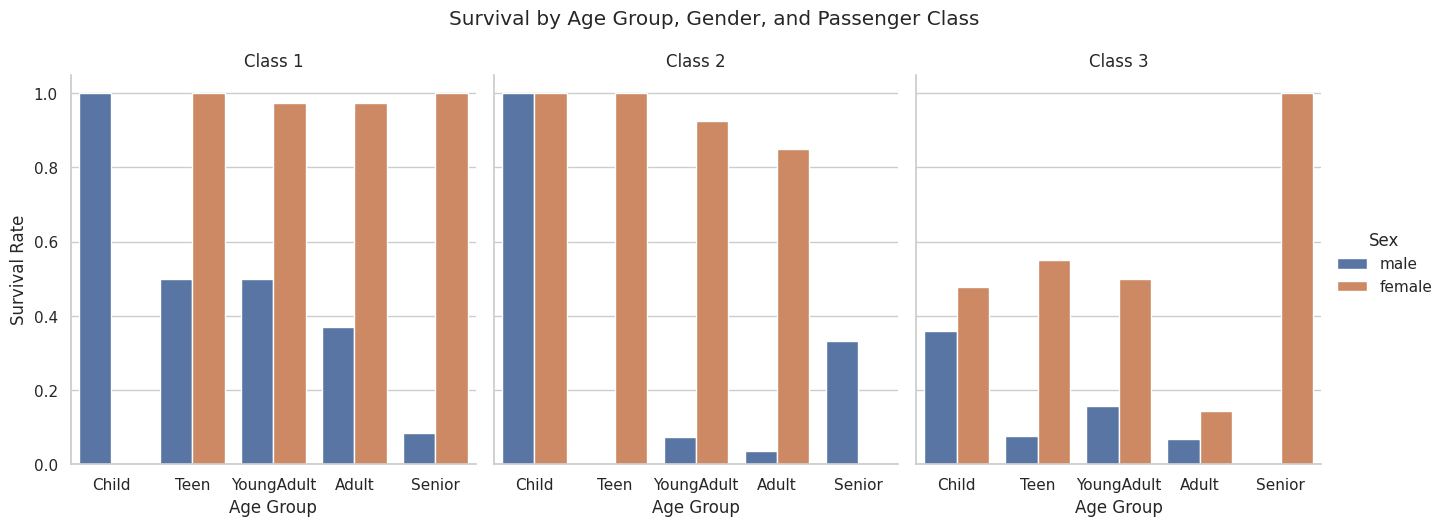

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Age bins for clearer grouping
df['Age_bin'] = pd.cut(
    df['Age'],
    bins=[0,12,18,35,60,80],
    labels=['Child','Teen','YoungAdult','Adult','Senior']
)

# --- 1. Grouped barplot: Gender + Pclass ---
plt.figure(figsize=(10,6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, errorbar=None)
plt.title('Survival Rate by Gender and Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# --- 2. Grouped barplot: Age group + Gender ---
plt.figure(figsize=(10,6))
sns.barplot(x='Age_bin', y='Survived', hue='Sex', data=df, errorbar=None)
plt.title('Survival Rate by Age Group and Gender')
plt.ylabel('Survival Rate')
plt.show()

# --- 3. FacetGrid: Age x Gender across Classes ---
g = sns.catplot(
    x='Age_bin', y='Survived', hue='Sex',
    col='Pclass', data=df,
    kind='bar', errorbar=None,
    height=5, aspect=0.9
)
g.set_titles("Class {col_name}")
g.set_axis_labels("Age Group", "Survival Rate")
g.fig.suptitle("Survival by Age Group, Gender, and Passenger Class", y=1.05)
plt.show()


# **10. Were there passengers with missing data, and how might this affect analysis?**

In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Age'] = df.groupby(['Sex','Pclass'])['Age'].transform(
    lambda x: x.fillna(x.median())
)
df['Cabin_known'] = df['Cabin'].notnull().astype(int)
df['Age_bin'] = pd.cut(
    df['Age'],
    bins=[0,12,18,35,60,80],
    labels=['Child','Teen','YoungAdult','Adult','Senior']
)

df['Age_group'] = pd.cut(
    df['Age'],
    bins=[0,12,18,35,60,80],
    labels=['Child','Teen','YoungAdult','Adult','Senior']
)
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Age_bin          0
Age_group        0
Family_size      0
Fare_bin         0
Cabin_known      0
dtype: int64
